# Staż Techmo - zadania

Poniżej znajdują się 3 zadania, które należy rozwiązać poprzez napisanie odpowiedniego kodu (w komórkach pod treścią zadania w pliku **staz.ipynb**), pozwalającego na wykonanie wymaganych w zadaniu obliczeń i prezentacje wyników. Przy rozwiązywaniu zadań można korzystać z dowolnych paczek dostępnych w managerze Pip np. numpy, pandas, librosa itp.

Notebook z rozwiązaniem oraz dane wrzuć na swojego githuba razem z plikiem *requirements.txt* pozwalającym na łatwą instalacje wszystkich wymaganych paczek.

In [5]:
!pip install -r requirements.txt
import numpy as np
import librosa
import matplotlib.pyplot as plt
from librosa import display
import json
from sklearn.metrics import confusion_matrix , accuracy_score
from IPython.display import Audio

## 1. Przetwarzanie sygnałów

* Wczytaj plik dźwiękowy *audio.wav*
* Wstaw widget z audioplayerem tak, aby można było odsłuchać plik
* Narysuj **oscylogram**
* Wyznacz i narysuj przebieg tonu podstawowego **F0**
* Wyznacz i narysuj w skali decybelowej krótkoczasowe widmo sygnału (**STFT**). Dobierz odpowiednie wg Ciebie parametry analizy. Uzasadnij swój wybór.
* Wyznacz i narysuj w skali decybelowej wartości **MFCC** (13 współczynników). Parametry analizy pozostaw takie jak w kroku poprzednim.

In [6]:
#wczytwanie i widget
x,fs = librosa.load('audio.wav')
Audio(x,rate=fs)

Text(0.5, 1.0, 'Oscylogram audio.wav')

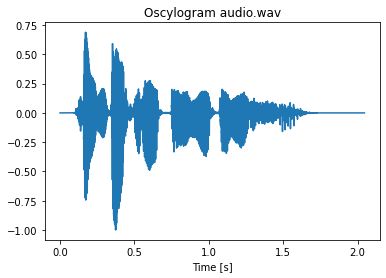

In [7]:
#oscylogram
plt.figure()
plt.plot(np.arange(0,len(x)/fs,1/fs),x)
plt.xlabel("Time [s]")
plt.title("Oscylogram audio.wav")

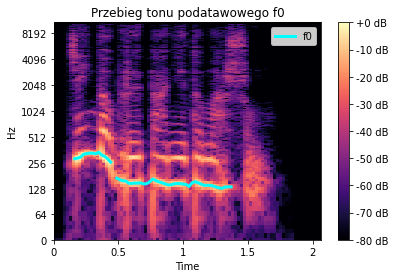

In [8]:
#f0
f0,v_f,v_p=librosa.pyin(x,50,500,fs,frame_length=2048)
time=librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Przebieg tonu podatawowego f0')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(time, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

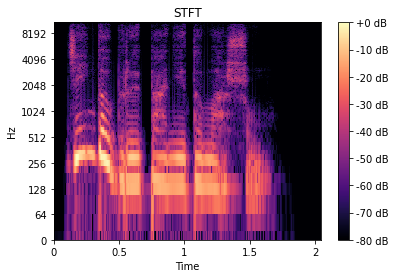

In [9]:
#STFT

#fs=22050
n_fft=512
win_length=512
hop_length=int(win_length/4)

S=np.abs(librosa.stft(x,n_fft=n_fft,win_length=win_length,hop_length=hop_length,window='hamming'))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time',sr=fs,hop_length=int(hop_length),ax=ax)
ax.set_title('STFT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Wybrałem ramkę 512, ponieważ przy częstoltliwości próbkowania 22050 daje nam to 23 ms ramkę. Do 25 ms sygnał mowy jest stacjonarny (dla dłuższych próbek przestaje zyskujemy wtedy lepsze formanty, lecz tracimy na rozdzielczości w dziedzinie czasu). Dzięki zakładkowaniu 1/4 długości ramki zyskujemy na rozdzielczości czasowej, natomiast okienkuję oknem Hamminga, ponieważ nie daje dużego przecieku widma. W stosunku do ustawień domyślnych (dla wykresu f0) tracimy na rozdzielczości częstotliwości, lecz zyskujemy na rozdzielczości czasu.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


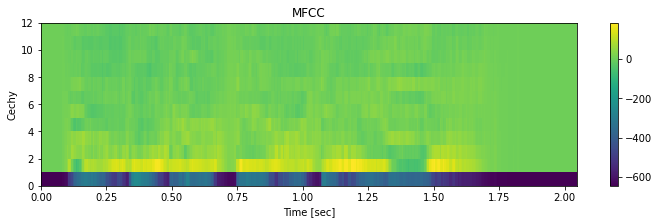

In [10]:
#mfcc
def plot_2d(t,f,X,title, ylab):
    fig = plt.figure(figsize=(12, 3))
    im1 = plt.pcolormesh(t, f, X)
    plt.title(title)
    plt.xlabel("Time [sec]")
    plt.ylabel(ylab)
    fig.colorbar(im1)

mfcc=librosa.feature.mfcc(x,fs,None,13,n_fft=n_fft,win_length=win_length,hop_length=hop_length,window='hamming').T

t=np.linspace(0,len(x)/fs,np.shape(mfcc)[0])
f=np.arange(0,float(np.shape(mfcc)[1]))

plot_2d(t,f,mfcc.T,"MFCC","Cechy")

## 2. Metryki

W pliku *predicted.json* zapisane są wyniki rozpoznania systemu ASR, służącego do rozpoznawania cyfr.

Dla każdej cyfry od 0 do 9 w słowniku przedstawione są wartości, jakie system rozpoznał dla kolejnych nagrań danej cyfry. 

Oblicz i przedstaw w formie tabeli **macierz pomyłek** (confusion matrix) oraz oblicz **skuteczność** systemu.

In [11]:
#wczytanie słownika z json
with open('predicted.json') as f:
  data=json.load(f)

#konwertowanie danych na int i do wektorów true i prediction
true_list=[]
prediction_list=[]
for k,v in data.items():
  temp_list=[]
  for i in range(0,len(data['0'])):
    true_list.append(int(k))
  for e in v:
    e=int(e)
    prediction_list.append(e)

#confusion matrix
conf_mtx=confusion_matrix(true_list,prediction_list)

# <center>Confusion matrix</center>
<center>Predicted</center>

|   |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| **0** | 47 |  0 |  0 |  0 |  0 |  1 |  0 |  1 |  1 |  0 |
| **1** |  0 | 45 |  0 |  0 |  1 |  0 |  0 |  3 |  1 |  0 |
| **2** |  1 |  0 | 45 |  0 |  0 |  1 |  0 |  0 |  3 |  0 |
| **3** |  0 |  0 |  0 | 45 |  3 |  0 |  2 |  0 |  0 |  0 |
| **4** |  0 |  0 |  0 |  1 | 44 |  0 |  2 |  3 |  0 |  0 |
| **5** |  0 |  0 |  0 |  0 |  0 | 40 |  0 |  0 |  0 | 10 |
| **6** |  0 |  0 |  0 |  0 |  0 |  0 | 47 |  0 |  0 |  3 |
| **7** |  0 |  0 |  0 |  0 |  0 |  0 |  0 | 49 |  1 |  0 |
| **8** |  0 |  0 |  0 |  0 |  0 |  0 |  0 |  0 | 50 |  0 |
| **9** |  0 |  0 |  0 |  0 |  0 |  3 |  0 |  0 |  0 | 47 |
**True**


In [12]:
#skuteczność
skutecznosc=100*accuracy_score(true_list,prediction_list)
print("Skuteczność systemu wynosi %s " % (skutecznosc)+"%")

Skuteczność systemu wynosi 91.8 %


## 3. Algebra

W plikach tekstowych `matrix_P.txt` oraz `matrix_Q.txt` znajduje się po 8 pomiarów 4-wymiarowej zmiennej (8 wierszy po 4 wartości).
* Wczytaj macierze do osobnych zmiennych `P` , `Q`.
* Korzystając z biblioteki `numpy` zaimplementuj funkcję obliczającą wzór:

$$
D_{KL}(P, Q) = \frac{1}{2} \mathrm{tr}\{(\boldsymbol{\Sigma}_p^{-1} + \boldsymbol{\Sigma}_q^{-1})(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)^T + \boldsymbol{\Sigma}_p \boldsymbol{\Sigma}_q^{-1} + \boldsymbol{\Sigma}_q \boldsymbol{\Sigma}_p^{-1} - 2 \boldsymbol{I}\}
$$

gdzie:

$\mathrm{tr}$ – ślad macierzy (trace)

$\boldsymbol{\Sigma}$ – macierz kowariancji

$\boldsymbol{\mu}$ – uśredniony wektor ze wszystkich pomiarów

$\boldsymbol{I}$ – macierz jednostkowa

> Dla podanych danych funkcja powinna zwrócić wartość ok. 6.03

In [13]:
#wczytywanie macierzy z txt
def wcz_mtx(path):
  f = open(path)
  file_lines = []
  line = f.readline()
  while line!="":
    n_line = line.replace("\n", "")
    n_line = n_line.split(" ")

    #zamiana na int
    n_line_int=[]
    for n in n_line:  
        n_line_int.append(int(n))

    file_lines.append(n_line_int)
    line = f.readline()
  return file_lines

P=np.vstack(wcz_mtx('matrix_P.txt'))
print(P)
Q=np.vstack(wcz_mtx('matrix_Q.txt'))
print(Q)

[[4 5 5 3]
 [1 4 2 4]
 [2 0 6 6]
 [7 7 0 6]
 [7 1 5 0]
 [2 6 7 0]
 [4 1 5 0]
 [1 1 4 6]]
[[0 4 5 4]
 [1 5 6 0]
 [0 5 6 5]
 [7 2 0 7]
 [6 3 7 3]
 [7 2 4 0]
 [4 1 3 1]
 [4 6 5 6]]


In [14]:
#obliczanie wzoru
def t_wekt(vek):
  m_wekt= [[float(0) for f in range(0,1)]for k in range(0,len(vek))]
  m_wekt=np.vstack(m_wekt)
  n=0
  for e in vek:
    m_wekt[n]=e
    n=n+1 
  return m_wekt

#uśredniony wektor ze wszystkich pomiarów
Q_v_sr=np.mean(Q.T,1)
P_v_sr=np.mean(P.T,1)

#macierze kowariancji
Q_cov=np.cov(Q.T)
P_cov=np.cov(P.T)

#odwrotność macierzy kowariancji
Q_cov_inv=np.linalg.inv(Q_cov)
P_cov_inv=np.linalg.inv(P_cov)

wzor=0.5*np.trace((np.dot((P_cov_inv+Q_cov_inv),((P_v_sr-Q_v_sr)*t_wekt(P_v_sr-Q_v_sr))))+np.dot(P_cov,Q_cov_inv)+np.dot(Q_cov,P_cov_inv)-2*np.identity(4))
print(wzor)

6.033482453811381
